In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
from google.colab import files

# Upload file manually
uploaded = files.upload()

# Load dataset
df = pd.read_csv(next(iter(uploaded)))

Saving NIFTY50_all.csv to NIFTY50_all.csv


In [ ]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619.0,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278.0,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678.0,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913.0,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123.0,0.2741


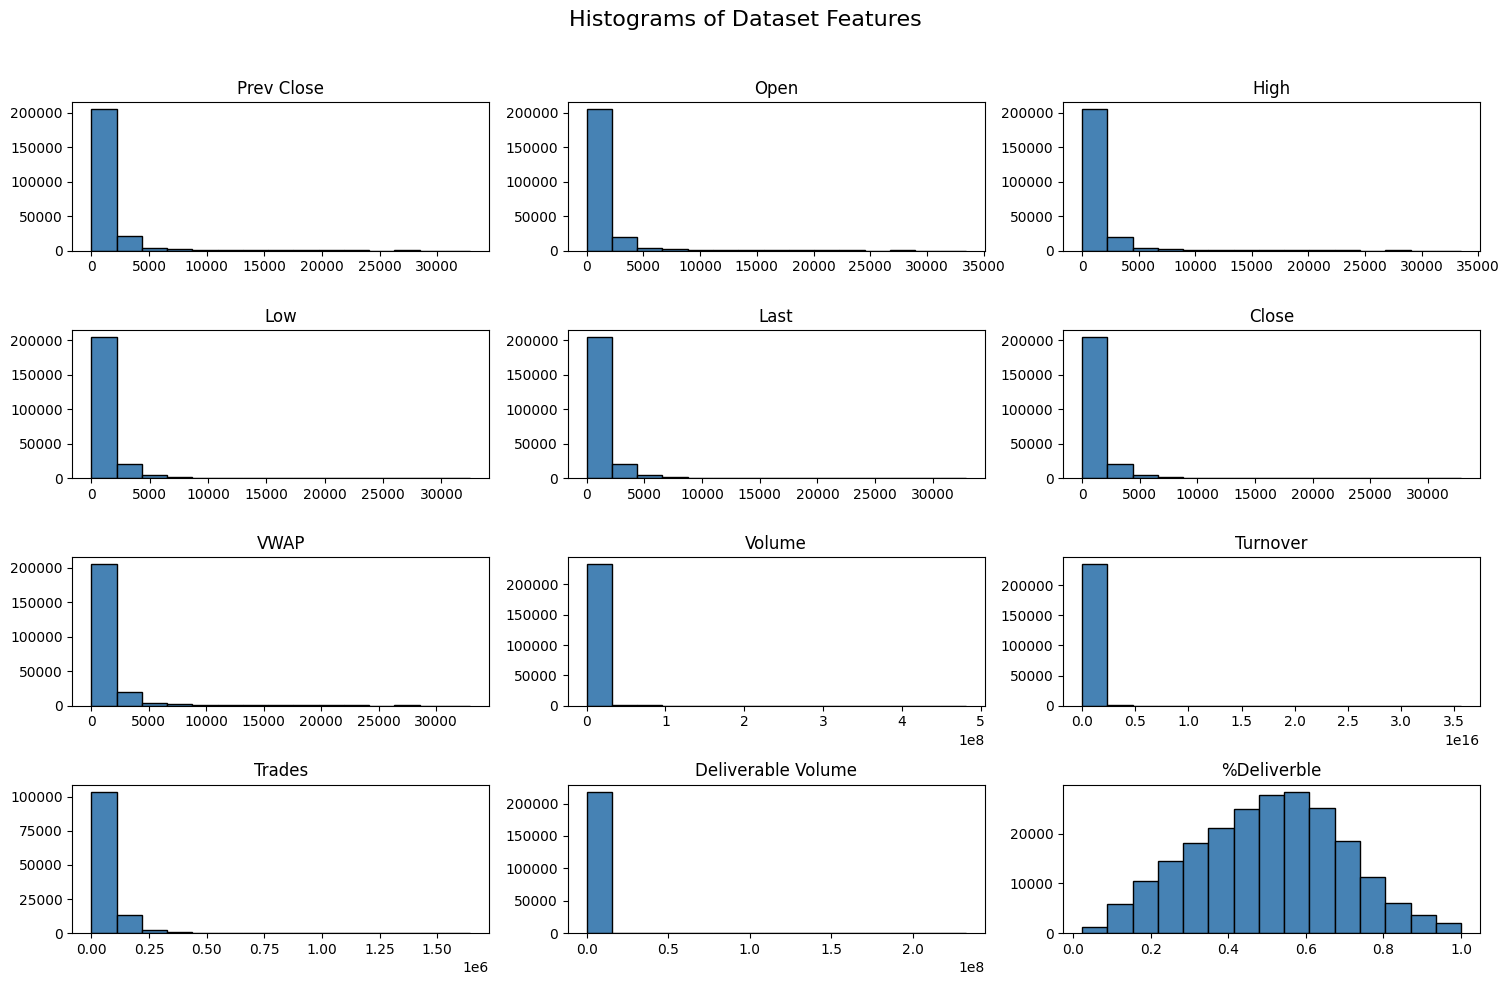

In [ ]:
# Create histograms for each feature
df.hist(bins=15, figsize=(15, 10), color='steelblue', edgecolor='black', grid=False)

# Formatting
plt.suptitle('Histograms of Dataset Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
# Feature Engineering
df['MA_5'] = df['Close'].rolling(window=5).mean()
df['MA_10'] = df['Close'].rolling(window=10).mean()
df['Return'] = df['Close'].pct_change()
df['Volatility'] = df['Return'].rolling(window=5).std()
df.dropna(inplace=True)

In [ ]:
# Selecting Features and Target
features = ['Open', 'High', 'Low', 'Prev Close', 'MA_5', 'MA_10', 'Volatility', 'Volume']
X = df[features]
y = df['Close']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression

In [ ]:
# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_pred = lr_model.predict(X_test_scaled)

# Calculate regression metrics
mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)
mape_lr = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # MAPE formula

# Print metrics
print(f"Mean Squared Error (MSE): {mse_lr:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.4f}")
print(f"Mean Absolute Error (MAE): {mae_lr:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_lr:.4f}%")
print(f"R² Score: {r2_lr:.4f}")

Mean Squared Error (MSE): 82.3684
Root Mean Squared Error (RMSE): 9.0757
Mean Absolute Error (MAE): 4.5879
Mean Absolute Percentage Error (MAPE): 0.5986%
R² Score: 0.9999


# LSTM

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Reshape input data for LSTM
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Build LSTM model
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train_scaled.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=16, verbose=1, callbacks=[early_stop])

# Make predictions
y_pred_lstm = lstm_model.predict(X_test_lstm).flatten()  # Flatten to match y_test shape

# Calculate regression metrics
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)
mape_lstm = np.mean(np.abs((y_test - y_pred_lstm) / y_test)) * 100  # MAPE formula

# Print metrics
print(f'LSTM Mean Squared Error (MSE): {mse_lstm:.4f}')
print(f'LSTM Root Mean Squared Error (RMSE): {rmse_lstm:.4f}')
print(f'LSTM Mean Absolute Error (MAE): {mae_lstm:.4f}')
print(f'LSTM Mean Absolute Percentage Error (MAPE): {mape_lstm:.4f}%')
print(f'LSTM R² Score: {r2_lstm:.4f}')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
6018/6018 ━━━━━━━━━━━━━━━━━━━━ 61s 9ms/step - loss: 11289526.0000
Epoch 2/50
6018/6018 ━━━━━━━━━━━━━━━━━━━━ 57s 9ms/step - loss: 519876.8438
Epoch 3/50
6018/6018 ━━━━━━━━━━━━━━━━━━━━ 57s 10ms/step - loss: 130648.3281
Epoch 4/50
6018/6018 ━━━━━━━━━━━━━━━━━━━━ 82s 9ms/step - loss: 126905.9219
Epoch 5/50
6018/6018 ━━━━━━━━━━━━━━━━━━━━ 58s 10ms/step - loss: 121536.2891
Epoch 6/50
6018/6018 ━━━━━━━━━━━━━━━━━━━━ 81s 10ms/step - loss: 120013.3672
Epoch 7/50
6018/6018 ━━━━━━━━━━━━━━━━━━━━ 81s 9ms/step - loss: 117398.9062
Epoch 8/50
6018/6018 ━━━━━━━━━━━━━━━━━━━━ 57s 10ms/step - loss: 115349.9062
Epoch 9/50
6018/6018 ━━━━━━━━━━━━━━━━━━━━ 57s 9ms/step - loss: 112077.0625
Epoch 10/50
6018/6018 ━━━━━━━━━━━━━━━━━━━━ 83s 10ms/step - loss: 107688.6094
Epoch 11/50
6018/6018 ━━━━━━━━━━━━━━━━━━━━ 82s 10ms/step - loss: 112085.9453
Epoch 12/50
6018/6018 ━━━━━━━━━━━━━━━━━━━━ 82s 10ms/step - loss: 102728.8984
Epoch 13/50
6018/6018 ━━━━━━━━━━━━━━━━━━━━ 80s 9ms/step - loss: 101383.7578
Epoch 14/50


### Ensemble (LR, GBM, RF, SVM)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

base_models = [
    ('lr', LinearRegression()),
    ('gb', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),
    ('rf', RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)),
    ('svm', SVR(kernel='rbf', C=100, gamma=0.1))
]

# Meta-model (Linear Regression)
meta_model = LinearRegression()

# Create the stacking model
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Train the stacking model
stacking_model.fit(X_train_scaled, y_train)

# Make predictions using the stacking model
y_pred_stacking = stacking_model.predict(X_test_scaled)

# Calculate regression metrics for the stacked model
mse_stacking = mean_squared_error(y_test, y_pred_stacking)
rmse_stacking = np.sqrt(mse_stacking)
mae_stacking = mean_absolute_error(y_test, y_pred_stacking)
r2_stacking = r2_score(y_test, y_pred_stacking)
mape_stacking = np.mean(np.abs((y_test - y_pred_stacking) / y_test)) * 100  # MAPE formula

# Print stacking model metrics
print(f'Stacking - Mean Squared Error (MSE): {mse_stacking:.4f}')
print(f'Stacking - Root Mean Squared Error (RMSE): {rmse_stacking:.4f}')
print(f'Stacking - Mean Absolute Error (MAE): {mae_stacking:.4f}')
print(f'Stacking - Mean Absolute Percentage Error (MAPE): {mape_stacking:.4f}%')
print(f'Stacking - R² Score: {r2_stacking:.4f}')

Stacking - Mean Squared Error (MSE): 82.3959
Stacking - Root Mean Squared Error (RMSE): 9.0772
Stacking - Mean Absolute Error (MAE): 4.6089
Stacking - Mean Absolute Percentage Error (MAPE): 0.6003%
Stacking - R² Score: 0.9999


# Graphs

([0, 1, 2],
 [Text(0, 0, 'Linear Regression'), Text(1, 0, 'Stacking'), Text(2, 0, 'LSTM')])

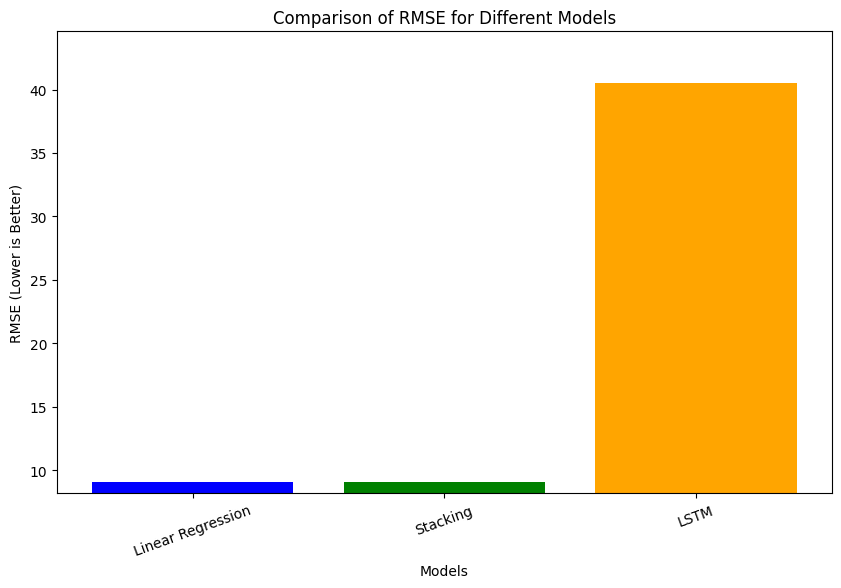

In [ ]:
# RMSE values of all models
rmse_values = {
    "Linear Regression": rmse_lr,
    "Stacking": rmse_stacking,
    "LSTM":rmse_lstm
}

# Plot the RMSE values
plt.figure(figsize=(10, 6))
plt.bar(rmse_values.keys(), rmse_values.values(), color=['blue', 'green', 'orange', 'red'])

# Formatting
plt.xlabel("Models")
plt.ylabel("RMSE (Lower is Better)")
plt.title("Comparison of RMSE for Different Models")
plt.ylim(min(rmse_values.values()) * 0.9, max(rmse_values.values()) * 1.1)  # Adjust y-axis
plt.xticks(rotation=20)

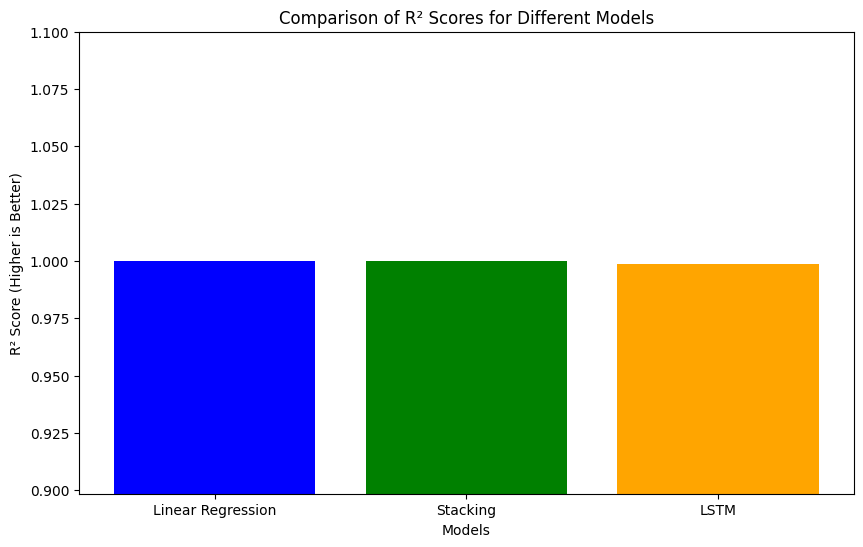

In [ ]:
# R² values of all models
r2_values = {
    "Linear Regression": r2_lr,
    "Stacking": r2_stacking,
    "LSTM": r2_lstm
}

# Plot the R² values
plt.figure(figsize=(10, 6))
plt.bar(r2_values.keys(), r2_values.values(), color=['blue', 'green', 'orange', 'red', 'purple'])

# Formatting
plt.xlabel("Models")
plt.ylabel("R² Score (Higher is Better)")
plt.title("Comparison of R² Scores for Different Models")
plt.ylim(min(r2_values.values()) - 0.1, 1.1)  # Adjust y-axis to show variation

plt.show()

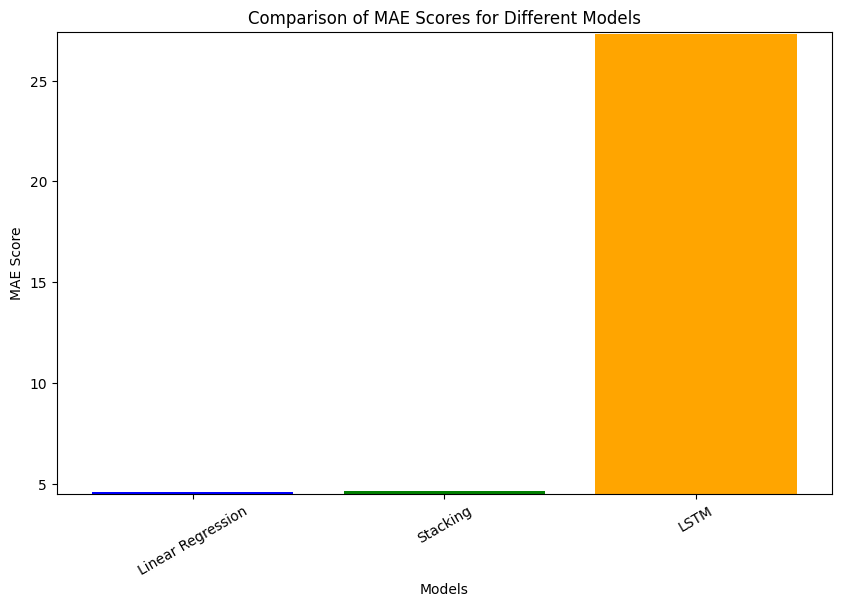

In [ ]:
# MAE values of all models
mae_values = {
    "Linear Regression": mae_lr,
    "Stacking": mae_stacking,
    "LSTM": mae_lstm
}

# Plot the MAE values
plt.figure(figsize=(10, 6))
plt.bar(mae_values.keys(), mae_values.values(), color=['blue', 'green', 'orange', 'red', 'purple'])

# Formatting
plt.xlabel("Models")
plt.ylabel("MAE Score")
plt.title("Comparison of MAE Scores for Different Models")
plt.xticks(rotation=30)  # Rotate labels for better visibility
plt.ylim(min(mae_values.values()) - 0.1, max(mae_values.values()) + 0.1)  # Dynamically adjust y-axis

# Show plot
plt.show()

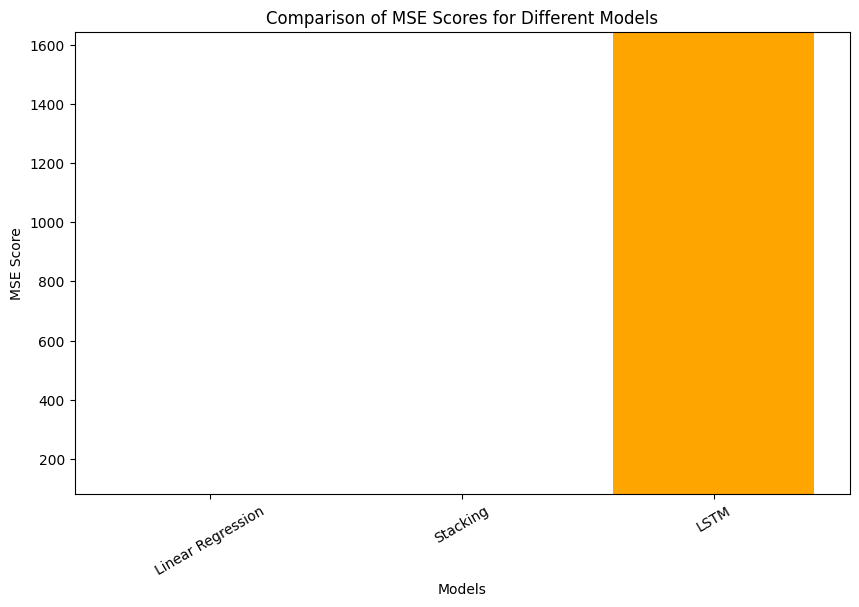

In [ ]:
# MSE values of all models
mse_values = {
    "Linear Regression": mse_lr,
    "Stacking": mse_stacking,
    "LSTM": mse_lstm
}

# Plot the MSE values
plt.figure(figsize=(10, 6))
plt.bar(mse_values.keys(), mse_values.values(), color=['blue', 'green', 'orange', 'red', 'purple'])

# Formatting
plt.xlabel("Models")
plt.ylabel("MSE Score")
plt.title("Comparison of MSE Scores for Different Models")
plt.xticks(rotation=30)  # Rotate labels for better visibility
plt.ylim(min(mse_values.values()) - 0.1, max(mse_values.values()) + 0.1)  # Dynamically adjust y-axis

# Show plot
plt.show()


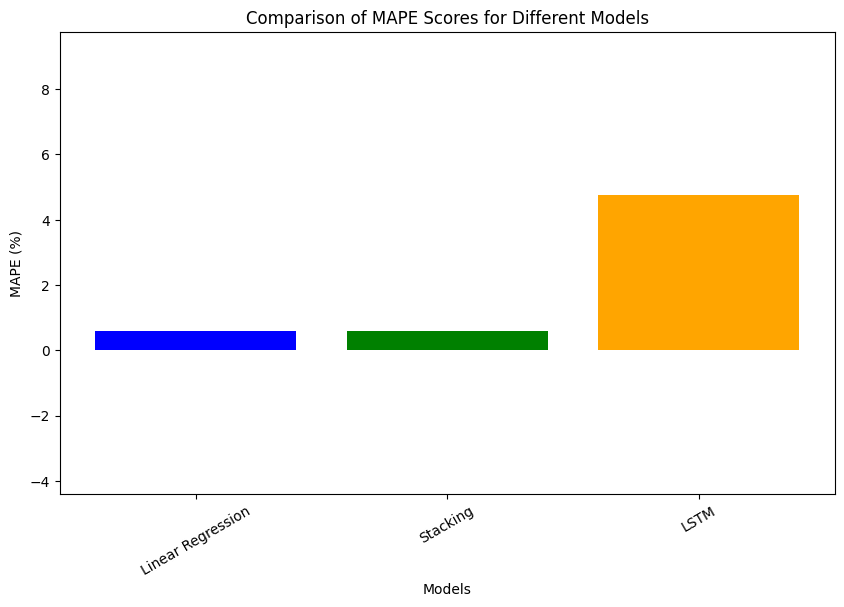

In [ ]:
# MAPE values of all models
mape_values = {
    "Linear Regression": mape_lr,
    "Stacking": mape_stacking,
    "LSTM": mape_lstm
}

# Plot the MAPE values
plt.figure(figsize=(10, 6))
plt.bar(mape_values.keys(), mape_values.values(), color=['blue', 'green', 'orange', 'red', 'purple'])

# Formatting
plt.xlabel("Models")
plt.ylabel("MAPE (%)")  # MAPE is a percentage
plt.title("Comparison of MAPE Scores for Different Models")
plt.xticks(rotation=30)  # Rotate labels for better readability
plt.ylim(min(mape_values.values()) - 5, max(mape_values.values()) + 5)  # Adjust y-axis dynamically

# Show plot
plt.show()